# Определение рыночной стоимости объектов недвижимости

Исходные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например: расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**
Установить параметры определения рыночной стоимости объектов недвижимости для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

**Ход исследования**
Данные по исследуемым объектам недвижимости хранятся в файле `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед началом исследования понадобится обзор данных. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-на-аномалии" data-toc-modified-id="Проверка-данных-на-аномалии-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка данных на аномалии</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Посчитаем-и-добавим-в-таблицу" data-toc-modified-id="Посчитаем-и-добавим-в-таблицу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Посчитаем и добавим в таблицу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#загружаем датасет и сохраняем в переменную real_estate
try:
    real_estate = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 3/real_estate_data.csv', sep='\t') 

except FileNotFoundError:
    real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
real_estate.info() #получаем общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 колонки, 23699 строк, тип данных int64, float64, object, bool. 

Согласно документации к данным:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


**Выводы**


Из документации известно, что по каждой продаваемой квартире представлены три типа данных: 
- которые пользователь представил сам (`balcony`, `ceiling_height`, `floor`, `floors_total`, `is_apartment`, `kitchen_area`, `last_price`, `living_area`, `locality_name`, `open_plan`, `rooms`, `studio`, `total_area`);
- полученные автоматически на основе картографических данных (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`);
- также в таблице отражены характеристики размещенного объявления (`days_exposition`, `first_day_exposition`, `total_images`).

В данных встречаются пропуски, типы данных в некоторых столбцах требуют замены. 


## Предобработка данных
Проверим данные на некорректные значения, подсчитаем процент пропущенных значений в каждом столбце. Заполним где возможно пропущенные значения.
 

### Проверка данных на аномалии

In [4]:
real_estate.describe().T #получаем описание данных 

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Проверив данные, обнаружили аномальные значения данных в столбцах: `ceiling_height`, `floors_total`. Т.к. эти столбцы заполняли непосредственно пользователи, то аномальные значения возникли из-за ошибки ввода данных пользователем. Некоторые значения в столбцах вызывают сомнения `rooms` и `balcony` (19 комнат и 5 балконов, почему бы и нет), но их корректность проверить не представляется возможным, поэтому примем эти значения за верные. В дальнейшем данные сильно выбивающиеся из общей тенденции в случае необходимости исключим из исследования.

Минимальной нормой в России считается высота потолка 2,4 метра, максимальной возьмем допустимое разумное значение 6,5. 
Подсчитаем число строк с аномальными значениями и исправим их на допустимые значения для дальнейшего корректного заполнения 
пропущенных значений в данном столбце.

In [5]:
len(real_estate.loc[(real_estate['ceiling_height'] < 2.5) | (real_estate['ceiling_height'] > 6.5)])

102

In [6]:
#Заменим значения меньше минимальной высоты потолка на значение 2.5, а значения больше максимальной высоты потолка на значение 6.5
real_estate.loc[(real_estate['ceiling_height'] < 2.5), 'ceiling_height'] = 2.5
real_estate.loc[(real_estate['ceiling_height'] > 6.5), 'ceiling_height'] = 6.5
len(real_estate.loc[(real_estate['ceiling_height'] < 2.5) | (real_estate['ceiling_height'] > 6.5)]) #проверяем отсутствие аномальных значений

0

Согласно https://peterburg.center/ln/samye-vysokie-zdaniya-sankt-peterburga-top-10-dominant-v-severnoy-stolice-reyting-2019.html
самым высоким ЖК в Санкт-Петербурге и Ленинградской области является ЖК Александр Невский его высота составляет 37 этажей. 
Подсчитаем число строк с аномальными значениями и исправим их на допустимые значения для дальнейшего корректного заполнения 
пропущенных значений в данном столбце. Ошибки в данном столбце связаны с опечатками, т.е. ошибками ввода информации пользователем.

In [7]:
len(real_estate.query('floors_total >= 37'))


3

In [8]:
#заполним медианным значением по столбцу 'floors_total'
real_estate.loc[(real_estate['floors_total'] >= 37), 'floors_total'] = real_estate['floors_total'].median() 
len(real_estate.query('floors_total >= 37'))

0

Заполнение медианными значениями аномальных данных необходимо для более точного заполнения пропущенных значений.


### Пропущенные значения

In [9]:
#считаем процент пропущенных значений в каждом столбце
(real_estate.isnull().sum()/len(real_estate)*100).sort_values().round(1) 

total_images             0.0
open_plan                0.0
floor                    0.0
rooms                    0.0
studio                   0.0
total_area               0.0
last_price               0.0
first_day_exposition     0.0
locality_name            0.2
floors_total             0.4
living_area              8.0
kitchen_area             9.6
days_exposition         13.4
ponds_around3000        23.3
parks_around3000        23.3
cityCenters_nearest     23.3
airports_nearest        23.4
ceiling_height          38.8
balcony                 48.6
ponds_nearest           61.6
parks_nearest           65.9
is_apartment            88.3
dtype: float64

Пропущенные значения присутствуют в столбцах:
- заполненных пользователем (`ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`);

- полученных автоматически (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`);

- об объявлении (`days_exposition`).

При заполнении пропущенных значений в столбцах будем ориентироваться на то, к какому типу данных о продаваемой квартире относится столбец, т.к. появление пропусков может быть связано с различными причинами, например в данных, заполненных пользователем - пропуск может быть обусловлен человеческим фактором или намеренным пропуском данных, тогда как в данных полученных автоматически пропуск мог появится из-за программной ошибки, на это указывает повторяющееся количество пропущенных значений. 

Процент пропущенных значений в `locality_name` составляет 0.2% (49 значений). Проверим уникальные значения столбца `locality_name` и их количество. 

In [10]:
print('Количество населенных пунктов:', len(real_estate['locality_name'].sort_values().unique()))
print(real_estate['locality_name'].sort_values().unique()) #проверим названия населенных пунктов в столбце 'locality_name'


Количество населенных пунктов: 365
['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня

В столбце `locality_name` видим большое количество одних и тех же населенных пунктов, написанных по разному. Для корректных расчетов по остальным столбцам приведем названия населенных пунктов к одному виду. Оставим только названия населенного пункта.

In [11]:
def del_name(name): # функция удаления части названия из столбца
    for i in range(len(name)):
        real_estate['locality_name'] =  real_estate['locality_name'].str.replace(name[i], '')

name = ['посёлок ', 'городской ', 'поселок станции ', 'деревня ', 'коттеджный ', 'поселок ', 'городского типа ', 'при железнодорожной станции ', 'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ']

del_name(name) #применяем функцию, в качестве аргумента указываем наименования, которые хотим удалить
print('Количество населенных пунктов:', len(real_estate['locality_name'].sort_values().unique())) #проверяем количество оставшихся уникальных значений

Количество населенных пунктов: 306


Теперь заполним пропуски с помощью данных в столбце `cityCenters_nearest`. Рассчитаем расстояние от центра города в пределах которого будет известно, что квартира находится на территории Санкт-Петербурга.

In [12]:
#сгруппируем данные по названию населенного пункта и рассчитаем медианное расстояние до центра города
real_estate_grouped = real_estate.groupby('locality_name')['cityCenters_nearest'].median().sort_values()
real_estate_grouped.head(5)

locality_name
Санкт-Петербург    12244.5
Парголово          19311.0
Мурино             21888.0
Стрельна           23506.0
Шушары             24212.0
Name: cityCenters_nearest, dtype: float64

Рассчитанное расстояние от центра Санкт-Петербурга до его ближайшего пригорода поселка Парголово составляет 19000 м. Отнесем все пропущенные значения населенных пунктов с расстоянием до центра менее 18000 м  к Санкт-Петербургу. 

In [13]:
#Заполним пропуски значением 'Санкт-Петербург', для `cityCenters_nearest` < 18000.
real_estate.loc[(real_estate['cityCenters_nearest'] < 18000 ), 'locality_name'] = real_estate['locality_name'].fillna(value='Санкт-Петербург') 
real_estate['locality_name'].isna().sum() #проверяем количество пропущенных значений

12

Осталось еще 12 пропущенных значений, т.к. их корректно восстановить не представляется возможным, то заполним данные пропуски значением 'unknown'.

In [14]:
real_estate['locality_name'] = real_estate['locality_name'].fillna('unknown') #
real_estate['locality_name'].isna().sum() #проверяем количество пропущенных значений

0

Процент пропущенных значений в столбце `floors_total` составляет 0.4% (86 значений). Сгруппируем пропущенные значения по населенному пункту и посчитаем медиану по каждой группе. 

В переменную real_estate_grouped сохраним таблицу, сгруппированную по названию населенного пункта и заполним медианой по столбцу `floors_total`. 
Создадим функцию на вход которой будет поступать 2 параметра: строка и столбец. Функция заполняет пропущенные 
значения медианой по конкретному населенному пункту.

In [15]:
real_estate_grouped = real_estate.groupby('locality_name')['floors_total'].median() 

def fillna_category(row, column):
    if pd.isna(row[column]):
        return real_estate_grouped.loc[row['locality_name']]
    return row[column]

real_estate['floors_total'] = round(real_estate.apply(lambda x: fillna_category(x, 'floors_total'), axis=1)) #применяем функцию для заполнения пропущенных значений в столбце 'floors_total'
real_estate['floors_total'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

0

В столбце `ceiling_height` 38.8% (9195) пропущенных значений. Возможная причина ошибок и пропущенных значений в данном столбце это ошибки пользователя при внесении данных. Заполним пропущенные значения медианой рассчитанной по группам названия населенного пункта, для этого воспользуемся функцией fillna_category().

In [16]:
real_estate_grouped = real_estate.groupby('locality_name')['ceiling_height'].median() #перезапишем переменную для столбца 'ceiling_height' 
real_estate['ceiling_height'] = real_estate.apply(lambda x: fillna_category(x, 'ceiling_height'), axis=1) #применяем функцию fillna_category
real_estate['ceiling_height'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

95

Из 9195 остались 95 незаполненных значения. Незаполненные значения остались из-за отсутствия данных о высоте потоков в некоторых населенных пунктах. Заполним пропущенные значения средним, т.к. в данных отсутствуют сильные выбросы, способные повлиять на него.

In [17]:
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(real_estate['ceiling_height'].mean()) #заполним пропущенные значения средним
real_estate['ceiling_height'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

0

В столбах `living_area` и `kitchen_area` - 1903(8.0%) и 2278(9.6%) пропущенных значения соответственно.
Доля значений в столбцах небольшая относительно всей таблице, оставим эти столбцы без изменения, т.к. пропущенные значения корректно востановить не представляется возможным, а примерное восстановление значений может повлиять на результаты исследования. 

Возможные варианты заполнения пропущенных данных, которые можно использовать, но они дают только примерные результаты, т.к. не учитывают нежилую площадь квартиры:
- заполнить пропущенные значения в `kitchen_area`, для квартир студий и квартир со свободной планировкой значением '0' (но таких значений всего 67 и 149 соответсвенно);
- заполнить пропущенные значения в `living_area`, для квартир студий и квартир со свободной планировкой значением `total_area` (5 и 10 заполненных пустых значений);
- заполнить пропущенные значения `kitchen_area` разницей между общей площадью квартиры  `total_area` и жилой площадью `living_area` (но после этого также остаются пропущенные значения).


Также не будем удалять данные столбцы, т.к. пропущенные значения не влияют на результат расчета, а данные из других столбцов могут быть полезны в исследовании. 

Заполним пропущенные значения в столбцах, полученных автоматически. 

Столбцы, в которых пропущены расстояния `airports_nearest`, `cityCenters_nearest`заполним с помощь функции fillna_category(), исходя из названия населенного пункта. Оставшиеся пропущенные значения оставим, т.к. данных для корретного их заполнения недостаточно. 

Т.к. пропущенные значения в столбцах , `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000` не будут использованы в основном исследовании и существенного значения на цену квартиры не оказывают, то оставим эти столбцы без изменений.

In [18]:
real_estate_grouped = real_estate.groupby('locality_name')['cityCenters_nearest'].median() #перезапишем переменную для столбца 'cityCenters_nearest'
real_estate['cityCenters_nearest'] = real_estate.apply(lambda x: fillna_category(x, 'cityCenters_nearest'), axis=1) #применяем функцию fillna_category
real_estate['cityCenters_nearest'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

4829

In [19]:
real_estate_grouped = real_estate.groupby('locality_name')['airports_nearest'].median() #перезапишем переменную для столбца 'airports_nearest'
real_estate['airports_nearest'] = real_estate.apply(lambda x: fillna_category(x, 'airports_nearest'), axis=1) #применяем функцию fillna_category
real_estate['airports_nearest'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

4829

Число пропущенных значений в столбцах `cityCenters_nearest` и `airports_nearest` сократилось незначительно. Оставим в этих столбцах пропущенные значения.

В столбце `days_exposition` - 3181 пропущенное значение (13.4%). Данная ошибка могла возникнуть из-за того, что объявление снимали в тот же день  после публикации. Для заполнения данных пропусков проверим, являются ли данные пропуски совершенно случайными. Для этого соотнесем пропущенные значения с днем выставления объявления.
Заменим тип в столбце `first_day_exposition` на дату, т.к. в дальнейшем нам будет необходимо вычислить из этого столбца данные о дне недели, месяце и годе публикации объявления.

In [20]:
#преобразуем столбец 'first_day_exposition' к типу data
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [21]:
#добавляем столбец с данными о дне недели выставления объявления
real_estate['day_of_week_exposition'] = real_estate['first_day_exposition'].dt.weekday #0 -понедельник 6 - воскресенье

In [22]:
#выведем распределние объявлений с пропущенным значением в 'days_exposition' по дням недели
real_estate.query('days_exposition != days_exposition')[['days_exposition', 'day_of_week_exposition']].groupby('day_of_week_exposition')['day_of_week_exposition'].count()

day_of_week_exposition
0    563
1    568
2    561
3    525
4    473
5    267
6    224
Name: day_of_week_exposition, dtype: int64

In [23]:
#выведем общеее распределение объявлений о продаже квартир по дням недели
real_estate[['days_exposition', 'day_of_week_exposition']].groupby('day_of_week_exposition')['day_of_week_exposition'].count()

day_of_week_exposition
0    3612
1    4183
2    3974
3    4295
4    4000
5    1936
6    1699
Name: day_of_week_exposition, dtype: int64

Количество пропущенных значений относительно дня недели распределено абсолютно случайно. В будние дни объявлений о продаже квартир больше и соответственно объявлений с пропущенным количеством днем выставления тоже больше по сравнению с выходными днями. Примерное количество объявлений с пропущенным количеством дней публикации равно в каждый будний день и в выходные.
Заменим пропущенные значения на '1', т.к. объявления все-таки были опубликованы.

In [24]:
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(1) #заменяем пропущенные значения
real_estate['days_exposition'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

0

В столбце `balcony` - 12180 пропущенных значения (48.6%). Пользователи пропустили данные значения т.к. скорее всего в квартирах отсутствуют балконы. Заменим все пропущенные значения в данном столбце на '0'.

In [25]:
real_estate['balcony'] = real_estate['balcony'].fillna(0) #заменяем пропущенные значения
real_estate['balcony'].isna().sum()  #проверяем остались ли пропущенные значения в столбце

0

В столбце `is_apartment` - 20924 пропущенных значений (88.3%), согласно документации тип данных в столбце - 'bool'. Пользователи пропустили данные значения т.к. их квартиры не относятся к апартаментам. Пользователи, которые продают апартаменты знают об этом и укажут тип аппартаменты в объявлении. Заменим все пропущенные значения в данном столбце на 'False'. 

In [26]:
real_estate['is_apartment'] = real_estate['is_apartment'].fillna(False) #заменяем пропущенные значения
real_estate['is_apartment'].isna().sum()  #проверяем остались ли пропущенные значения

0

In [27]:
real_estate.isna().sum() #проверяем оставшиеся пропущенные значения

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                1903
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2278
balcony                       0
locality_name                 0
airports_nearest           4829
cityCenters_nearest        4829
parks_around3000           5518
parks_nearest             15620
ponds_around3000           5518
ponds_nearest             14589
days_exposition               0
day_of_week_exposition        0
dtype: int64

### Изменение типов данных



Тип данных в столбцах `last_price`, `floors_total`, `balcony`, `days_exposition` - float64, однако данные в этих столбцах могут быть выражены только целыми числами, изменим тип данных этих столбцов на int, также для экономии памяти преобразуем все столбцы float64 к типу float32, а столбцы типа int64 к int32.

In [28]:
#заменяем неверные типы данных, проверяем результат проведенной замены

real_estate = real_estate.astype(
    {'total_images'           : 'int',
     'last_price'             : 'int',
     'total_area'             : 'float32',
     'rooms'                  : 'int',
     'ceiling_height'         : 'float32',
     'floors_total'           : 'int',
     'living_area'            : 'float32',
     'floor'                  : 'int',
     'kitchen_area'           : 'float32',
     'balcony'                : 'int',  
     'airports_nearest'       : 'float32',
     'cityCenters_nearest'    : 'float32',
     'parks_around3000'       : 'float32',
     'parks_nearest'          : 'float32',
     'ponds_around3000'       : 'float32',
     'ponds_nearest'          : 'float32',
     'days_exposition'        : 'int', 
     'day_of_week_exposition' : 'int'   
    }
) 

In [29]:
#проверяем произведенные изменения типов, а также оцениваем сокращение объема используемой памяти
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int32         
 1   last_price              23699 non-null  int32         
 2   total_area              23699 non-null  float32       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int32         
 5   ceiling_height          23699 non-null  float32       
 6   floors_total            23699 non-null  int32         
 7   living_area             21796 non-null  float32       
 8   floor                   23699 non-null  int32         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float3

### Удаление дубликатов

In [30]:
real_estate.duplicated().sum() #проверим наличие явных дубликатов данных

0

**Выводы**

Были обнаружены пропуски и некорректные значения в данных. В некоторых столбцах остались пропущенные значения, т.к. корректно их заполнить не представляется возможным. 

Удаление дубликатов и корректрировка аномалий позволит получить более точные результаты.


## Расчёты и добавление результатов в таблицу

### Посчитаем и добавим в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (варианты — первый, последний, другой);
- отношение жилой к общей площади, а также отношение площади кухни к общей.


Добавим столбец `square_meter_price` в котором рассчитаем отношение цены квартиры `last_price` к общей площади `total_area`.

In [31]:
real_estate['square_meter_price'] = (real_estate['last_price'] / real_estate['total_area']).astype('int64') 

Добавим столбцы с днем недели, месяцем и годом публикации объявления.

In [32]:
real_estate['month_exposition'] = real_estate['first_day_exposition'].astype('datetime64[M]')
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year

Добавим в таблицу столбец `floor_type`, заполним его  с помощью функции floor_type вариантами значения этажа (first, last, other).

In [33]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'first'
    
    if floor == floors_total:
        return 'last'
    
    return 'other'

real_estate['floor_type'] = real_estate.apply(floor_type, axis=1) #применяем функцию к таблице

Добавим столбцы `living_total_ratio`, `kitchen_total_ratio`, в которые запишем отношение жилой площади и площади кухни к общей площади.

In [34]:
real_estate['living_total_ratio'] = real_estate['living_area'] / real_estate['total_area']
real_estate['kitchen_total_ratio'] = real_estate['kitchen_area'] / real_estate['total_area']

**Выводы**

Добавили столбцы в таблицу с данными о цене квадратного метра квартиры, днем, месяцем и годом размещения объявления, категориями расположения квартиры по этажам, отношением жилой площади и площади кухни к общей площади.

##  Исследовательский анализ

Для начала исследования посмотрим числовые характеристики имеющихся данных.

In [35]:
real_estate.describe().T #получаем описание данных 

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23699.0,6.541549e+06,1.088701e+07,12190.000000,3.400000e+06,4.650000e+06,6.800000e+06,7.630000e+08
total_area,23699.0,6.034877e+01,3.565427e+01,12.000000,4.000000e+01,5.200000e+01,6.990000e+01,9.000000e+02
rooms,23699.0,2.070636e+00,1.078405e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23699.0,2.709041e+00,2.622989e-01,2.500000,2.550000e+00,2.700000e+00,2.700000e+00,6.500000e+00
floors_total,23699.0,1.066484e+01,6.572405e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,3.600000e+01
living_area,21796.0,3.445773e+01,2.203065e+01,2.000000,1.860000e+01,3.000000e+01,4.230000e+01,4.097000e+02
floor,23699.0,5.892358e+00,4.885249e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,21421.0,1.056978e+01,5.905396e+00,1.300000,7.000000e+00,9.100000e+00,1.200000e+01,1.120000e+02
balcony,23699.0,5.910798e-01,9.592982e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Для этого построим гистограммы для каждого параметра.

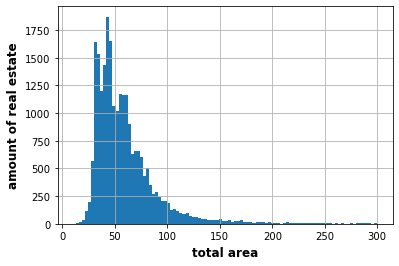

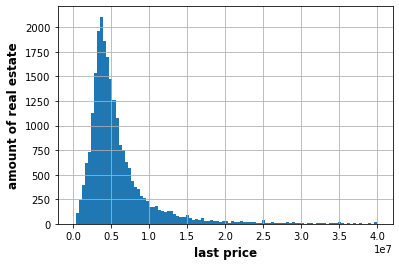

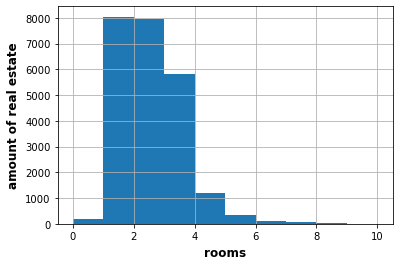

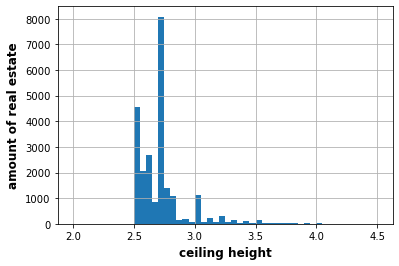

In [36]:
#Построим гистограммы 'total_area', 'last_price', 'rooms', 'ceiling_height'. 
# Для того, чтобы гистограмма стала более информативной,исключим выбивающиеся значения, подберем наиболее подходящие параметры.
ax = real_estate.hist(column='total_area', range = (10, 300),  bins=100, grid=True)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("total area", labelpad=5, weight='bold', size=12)
    x.set_ylabel("amount of real estate", labelpad=5, weight='bold', size=12)

    
ax = real_estate.hist(column='last_price', range = (0, 40000000), bins=100, grid=True)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("last price", labelpad=5, weight='bold', size=12)
    x.set_ylabel("amount of real estate", labelpad=5, weight='bold', size=12)

    
ax = real_estate.hist(column='rooms', range = (0, 10), bins=10, grid=True)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("rooms", labelpad=5, weight='bold', size=12)
    x.set_ylabel("amount of real estate", labelpad=5, weight='bold', size=12)
    
    
ax = real_estate.hist(column='ceiling_height', range = (2, 4.5), bins=50, grid=True)
ax = ax[0]
for x in ax:
    x.set_title("")   
    x.set_xlabel("ceiling height", labelpad=5, weight='bold', size=12)
    x.set_ylabel("amount of real estate", labelpad=5, weight='bold', size=12)

На графиках видно, что в данных присутствуют значительные выбросы.
Больше всего квартир общей площадью от 40 до 70 квадратных метров. Квартиры площадью больше 300 метров встреачются очень редко.
На графике распределения общей стоимость квартиры представляет собой нормальное распределение, на нем видно, что несмотря на наличие квартир со стоимостью 760 000 000, основная часть квартир не превышает по стоимости 30 000 000. Большинство квартир находятся в пределах от 3 400 000 до  6 800 000.
Большинство квартир имеют максимум 3 комнаты. Квартир с числом комнат больше 9 вообще единицы.
Высоту потолков более 4 метров имеют лишь отдельные квартиры. На графике 'ceiling_height' хорошо видны 2 пика 2.5 и 2.7 метров. (Это может указывать на год постройки дома, т.к. в новостройках потолки чаще всего имеют большую высоту, или может указывать на близкое расположение данной категории квартир в Санкт-Петербурге или к центру города).

Построим диаграммы размаха для данных `total_area`, `last_price`, `rooms`, `ceiling_height`, с учетом данных полученных из гистограмм, для того чтобы выяснить, какие значения можно отнести к выбросам и исключить из исследования.

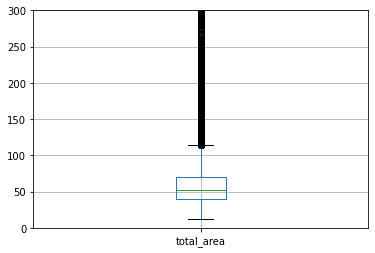

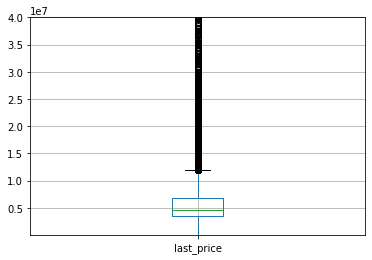

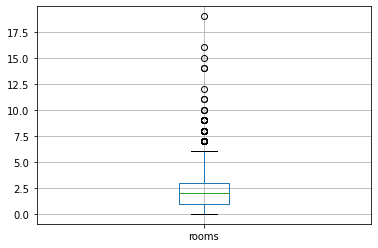

(2.3, 4.5)

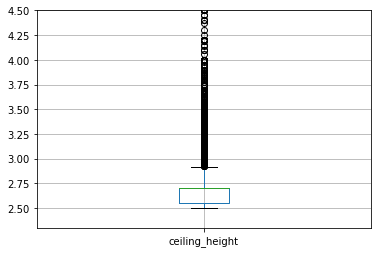

In [37]:
real_estate.boxplot('total_area')
plt.ylim(0, 300)
plt.show()
real_estate.boxplot('last_price')
plt.ylim(10000, 40000000)
plt.show()
real_estate.boxplot('rooms')
plt.show()
real_estate.boxplot('ceiling_height')
plt.ylim(2.3, 4.5)

Изучим время продажи квартиры. Построим гистограмму и диаграмму размаха для столбца `days_exposition`. Рассчитаем среднее и медианное значение.

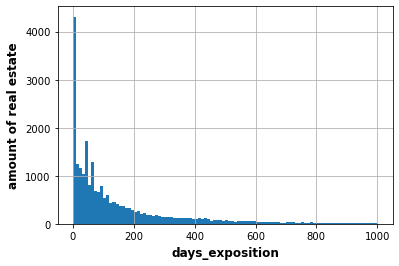

In [38]:
ax = real_estate.hist('days_exposition',  range = (0, 1000),bins=100)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("days_exposition", labelpad=5, weight='bold', size=12)
    x.set_ylabel("amount of real estate", labelpad=5, weight='bold', size=12)

На гистограмме видны 2 пика в районе 0 дней и около 74 дней. Пик около 0 дней необходимо исключить из исследования, т.к. скорее всего данные квартры не были проданы, а пользователи по тем или иным причинам удаляли объявления сразу после публикации. 

Для расчета более точных показателей очистим данные от выбросов. Удалим редкие и выбивающиеся значения. 
Создадим таблицу с разумно подходящими данными.
Примем значение в 1000 дней за верхнюю границу числа дней продажи, т.к. скорее всего после этого времени квартиры были уже проданы, но по тем или иным причинам объявления не были сняты. Отбросим значения в 1 день, т.к. там могут присутствовать объявления, которые были сняты в день публикации и с изменениями опубликованы еще раз.
Площадь квартир ограничим значением в 300 метров, т.к. больше данной площади лишь единичные квартиры, число комнат ограничим 8, а верхнюю границу высоты потолков установим на 4 метрах. Стоимость ограничим 40 000 000.

In [39]:
good_real_estate = real_estate.query('(1 < days_exposition <= 1000) and  (total_area <= 300) and (rooms <= 8) and (ceiling_height <= 4) and (last_price <= 40000000)')
len(good_real_estate)

20035

Из 23699 строк осталось 20035. Теперь мы можем быть уверены в качестве данных и достоверности результатов.

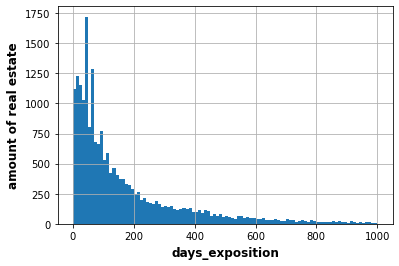

In [40]:
ax = good_real_estate.hist('days_exposition',  range = (0, 1000),bins=100, grid=True)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("days_exposition", labelpad=5, weight='bold', size=12)
    x.set_ylabel("amount of real estate", labelpad=5, weight='bold', size=12)

In [41]:
good_real_estate['days_exposition'].describe()

count    20035.000000
mean       166.366009
std        186.692060
min          2.000000
25%         44.000000
50%         93.000000
75%        219.000000
max       1000.000000
Name: days_exposition, dtype: float64

(0.0, 1150.0)

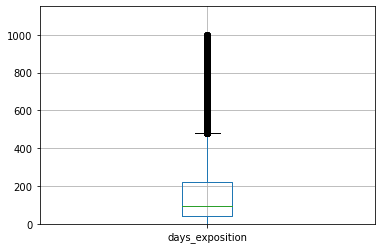

In [42]:
good_real_estate.boxplot('days_exposition')
plt.ylim(0, 1150)

In [43]:
good_real_estate['days_exposition'].mean(), good_real_estate['days_exposition'].median()

(166.36600948340404, 93.0)

Обычно квартиры продаются втечении 93 дней, в период от 44 до 219 дней. Это также подтверждает диаграмма размаха и вычисленная медиана, медианное значение срока продажи квартиры 93 дня.  Среднее же смещено, из-за большого количества выбросов.  
Случаются как очень быстрые, так и очень долгие продажи. Быстрой можно считать продажу, если она произошла за срок до 44 дней. Очень долгими можно назвать продажи дольше 470 дней.


Изучим какие факторы больше всего влияют на стоимость квартиры:
- зависит ли цена от площади, числа комнат, удалённости от центра;
- зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом;
- зависит ли цена от даты размещения: дня недели, месяца и года.

Для этого построим таблицу в которой будут отображены коэффициенты корреляции по столбцам `last_price`, `total_area`, `rooms`, `cityCenters_nearest`.

In [44]:
good_real_estate[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.782833,0.503035,-0.348765
total_area,0.782833,1.000000,0.790503,-0.237117
rooms,0.503035,0.790503,1.000000,-0.181432
cityCenters_nearest,-0.348765,-0.237117,-0.181432,1.000000


Из таблицы видно, что цена квартиры довольно сильно зависит от общей площади квартиры, а от количества комнат не сильно, это может быть обусловлено сильной взаимосвязью число комнат от общей площади квартиры. Связь удаленности от центра и стоимости квартиры обратная и выражена слабо. Рассмотрим данные взаимосвязи с помощью диаграмм рассеивания.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xl

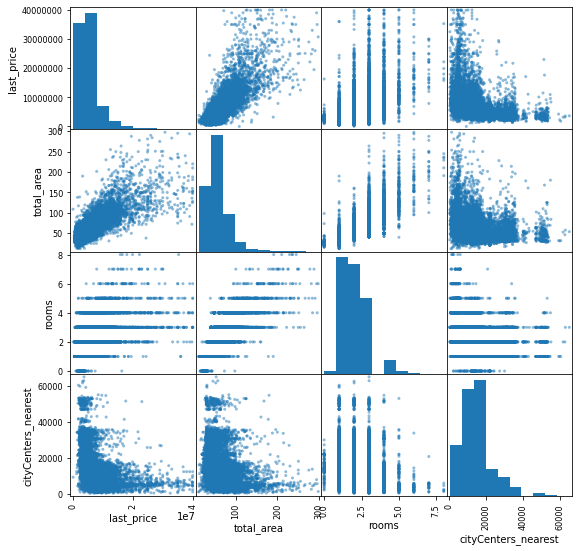

In [45]:
#построим матрицу диаграмм рассеивания для пар (last_price, total_area), (last_price, rooms), (last_price, cityCenters_nearest)
good_real_estate_matrix = good_real_estate[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(good_real_estate_matrix, figsize=(9, 9))

Графики подтвердили выводы: цена квартир зависит от площади квартиры, зависимость прямая, чем больше площадь квартиры, тем больше и стоимость. Цена квартиры незначительно зависит от количества комнат, а связь удаленности от центра и стоимости квартиры обратная и крайне мала.

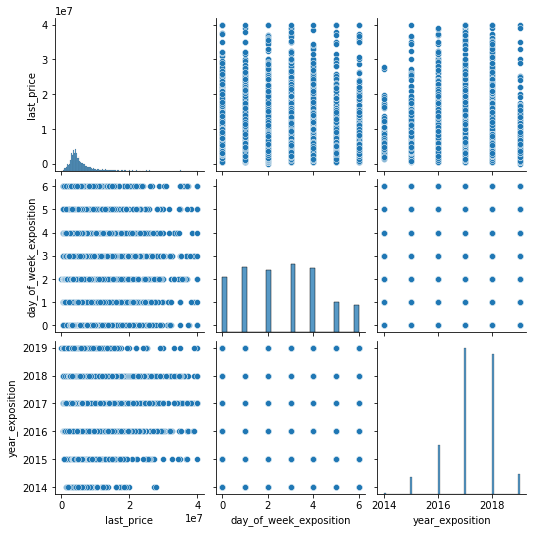

In [46]:
#построим диаграммы рассеивания для пар (last_price, day_of_week_exposition), (last_price, month_exposition), (last_price, year_exposition)
df = good_real_estate[['last_price','day_of_week_exposition', 'month_exposition', 'year_exposition']]
sns.pairplot(df)

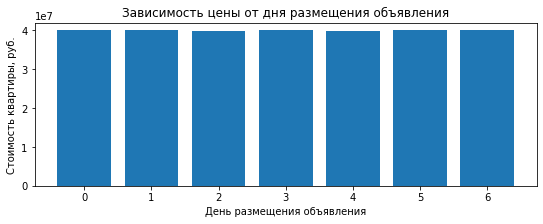

In [47]:
plt.figure(figsize=(9, 3))
plt.bar(df['day_of_week_exposition'], df['last_price'])

plt.title('Зависимость цены от дня размещения объявления')
plt.xlabel('День размещения объявления')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

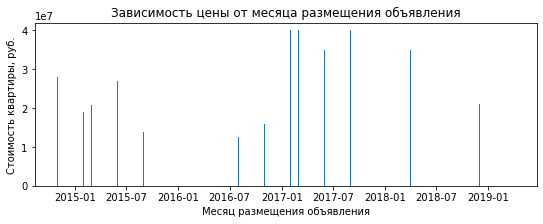

In [48]:
plt.figure(figsize=(9, 3))
plt.bar(df['month_exposition'], df['last_price'])

plt.title('Зависимость цены от месяца размещения объявления')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

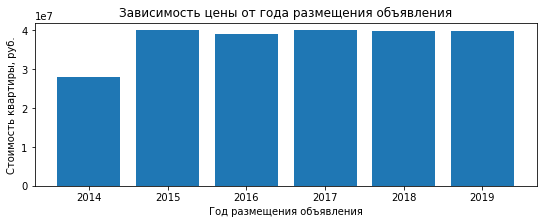

In [49]:
plt.figure(figsize=(9, 3))
plt.bar(df['year_exposition'], df['last_price'])

plt.title('Зависимость цены от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Из графиков видно, что наибольшее число объявлений приходилось на 2017 и 2018 годы, также в выходные число объявлений меньше, чем в будние дни. Количество объявлений в начале и в конце года больше, чем в остальное время. Стоимость квартр в 2014 году была ниже, чем в остальные года. Диаграммы показывают отсутствие взаимосвязи цены квартиры от дня недели, месяца и года публикации.

Рассчитаем долю и среднюю стоимость квартир в зависимости от этажа, на котором они расположены. 

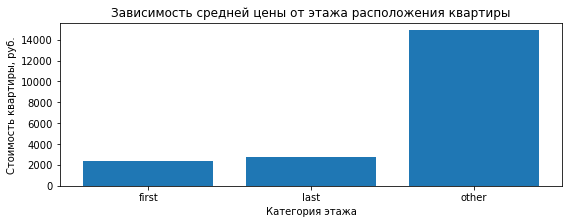

In [50]:
good_real_estate_pivot = good_real_estate.pivot_table(index='floor_type', values='last_price', aggfunc='count').reset_index()
good_real_estate_pivot['share_price'] = good_real_estate.groupby('floor_type')['last_price'].mean()
good_real_estate_pivot.sort_values(by='share_price')

plt.figure(figsize=(9, 3))
plt.bar(good_real_estate_pivot['floor_type'], good_real_estate_pivot['last_price'])

plt.title('Зависимость средней цены от этажа расположения квартиры')
plt.xlabel('Категория этажа')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Стоимость квартир, расположенных на первых этажах ниже, чем расположенных на последнем или другом этаже. Самая высокая стоимость у квартир расположенных ни на первом, ни на последнем этаже. Стоимость квартиры зависит от этажа на котором она расположена.

Сильнее всего на стоимость квартиры влияет ее общая площадь.

Выберем 10 населённых пунктов с наибольшим числом объявлений. 
Рассчитаем для каждого среднюю цену квадратного метра. 

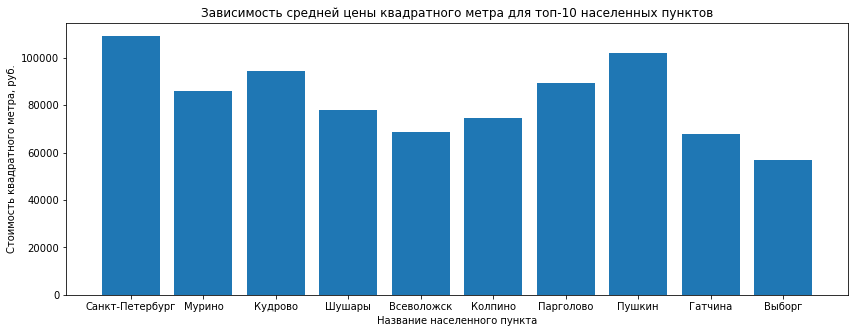

In [51]:
good_real_estate_top = (
    good_real_estate
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc=['mean','count']).round(2)
)
good_real_estate_top.columns = ['avg_square_meter_price', 'count']
good_real_estate_top = good_real_estate_top.sort_values(by='count', ascending=False, axis=0).reset_index().head(10)

plt.figure(figsize=(14, 5))
plt.bar(good_real_estate_top['locality_name'], good_real_estate_top['avg_square_meter_price'])

plt.title('Зависимость средней цены квадратного метра для топ-10 населенных пунктов')
plt.xlabel('Название населенного пункта')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

Самая высокая средняя цена квадратного метра в Санкт-Петербурге, а самая низкая стоимость квадратного метра в Выборге. 

Проанализируем квартиры в Санкт-Петербурге, задача состоит в том, чтобы выяснить, какая область входит в центр.
Выясним, какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Рассмотрим взаимосвязь стоимости квартиры со следующими параметрами:
площадь, число комнат, высота потолков, число комнат, этаж, удалённость от центра, дата размещения объявления. 

In [52]:
good_real_estate_spb = good_real_estate.query('locality_name == "Санкт-Петербург"')
#добавим столбец с целыми значениями расстояния до центра
good_real_estate_spb['cityCenters_nearest_km'] = (good_real_estate_spb['cityCenters_nearest']/1000).round(0).astype('int')
good_real_estate_spb

C:\Users\Anna\AppData\Local\Temp/ipykernel_20516/2617446761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_real_estate_spb['cityCenters_nearest_km'] = (good_real_estate_spb['cityCenters_nearest']/1000).round(0).astype('int')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,day_of_week_exposition,square_meter_price,month_exposition,year_exposition,floor_type,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
2,10,5196000,56.000000,2015-08-20,2,2.70,5,34.299999,4,False,...,574.0,558,3,92785,2015-08-01,2015,other,0.612500,0.148214,14
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,1,100000,2018-06-01,2018,other,0.320000,0.410000,8
9,18,5400000,61.000000,2017-02-26,3,2.50,9,43.599998,7,False,...,NaN,289,6,88524,2017-02-01,2017,other,0.714754,0.106557,15
10,5,5050000,39.599998,2017-11-16,1,2.67,12,20.299999,3,False,...,553.0,137,3,127525,2017-11-01,2017,other,0.512626,0.214646,14
15,16,4650000,39.000000,2017-11-18,1,2.70,14,20.500000,5,False,...,296.0,19,5,119230,2017-11-01,2017,other,0.525641,0.194872,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.000000,2019-04-01,3,3.05,15,63.000000,12,False,...,NaN,23,0,91089,2019-04-01,2019,other,0.623762,0.148515,14
23689,13,3550000,35.299999,2018-02-28,1,2.86,15,16.299999,4,False,...,652.0,29,2,100566,2018-02-01,2018,other,0.461756,0.257790,16
23690,3,5500000,52.000000,2018-07-19,2,2.70,5,31.000000,2,False,...,NaN,15,3,105769,2018-07-01,2018,other,0.596154,0.115385,6
23691,11,9470000,72.900002,2016-10-13,2,2.75,25,40.299999,7,False,...,806.0,519,3,129903,2016-10-01,2016,other,0.552812,0.145405,4


In [53]:
#рассчитаем медианное значение для общей цены квартиры и стоимости квадратного метра по удаленности от центра
good_real_estate_spb_pivot = (
    good_real_estate_spb
    .pivot_table(index='cityCenters_nearest_km', values=['last_price', 'square_meter_price'], aggfunc='median')
)
good_real_estate_spb_pivot

,last_price,square_meter_price
cityCenters_nearest_km,,
0,9590000,110357.0
1,10000000,118000.0
2,9200000,116822.0
3,7850000,104430.0
4,8548000,113571.0
5,8625000,125350.5
6,8000000,123408.5
7,6900000,120726.0
8,6825000,119553.5


Построим графики зависимости общей стоимости квартиры от удаленности от центра.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

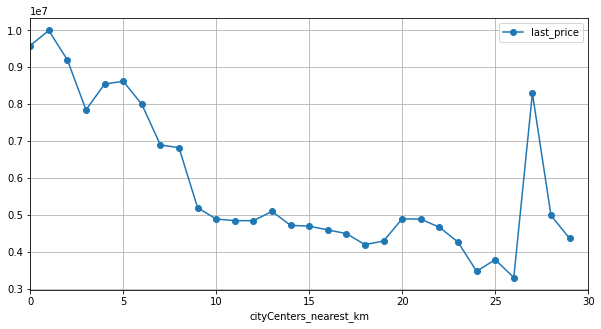

In [54]:
good_real_estate_spb_pivot.plot(y='last_price', style='o-', xlim=(0, 30), grid=True, figsize=(10, 5))

Построим графики зависимости стоимости квадратного метра квартиры от удаленности от центра.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

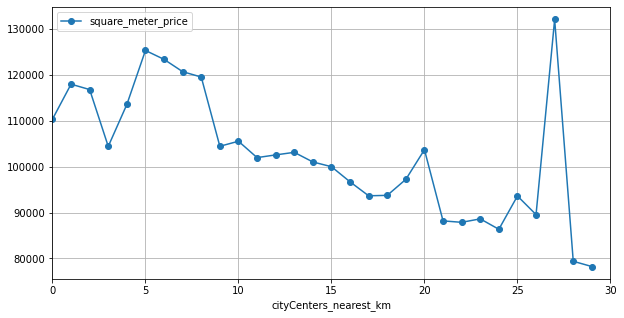

In [55]:
good_real_estate_spb_pivot.plot(y='square_meter_price', style='o-', xlim=(0, 30), grid=True, figsize=(10, 5))

Из графиков видно, что на расстоянии больше 8 км от центра стоимость квартир и стоимость квадратного метра резко снижается. Примем радиус в 8 км за центр города. На расстоянии 3 км от центра заметен существенное снижение стоимости квартир, это может быть связано с характеристиками квартир, т.к. в центральных районах преобладают коммунальные квартиры, а также, что в непосредственной близости от центральных районов находятся промышленные районы, квартиры в которых менее привлекательны, даже не смотря на географическую близость к центру города, соответственно и стоимость квартир в них существенно ниже.  
Также заметен пик на расстоянии 27 км, скорее всего здесь указаны данные о квартирах в городах-спутниках Санкт-Петербурга, которые территориально относятся к Санкт-Петербургу, а расстояние до центра Санкт-Петербурга не имеет значения, т.к. они относятся к элитным пригородам.

In [56]:
#сохраняем данные по квартирам в центре города в переменную good_real_estate_spb_center
good_real_estate_spb_center = good_real_estate_spb.query('cityCenters_nearest_km <= 8')
good_real_estate_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,day_of_week_exposition,square_meter_price,month_exposition,year_exposition,floor_type,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,1,100000,2018-06-01,2018,other,0.320000,0.410000,8
24,8,6500000,97.199997,2015-10-31,2,2.70,3,46.500000,1,False,...,124.0,265,5,66872,2015-10-01,2015,first,0.478395,0.201646,2
35,6,15500000,149.000000,2017-06-26,5,2.70,5,104.000000,4,False,...,779.0,644,0,104026,2017-06-01,2017,other,0.697987,0.114094,4
61,18,7990000,74.000000,2017-08-24,2,2.70,4,43.000000,4,False,...,NaN,609,3,107972,2017-08-01,2017,last,0.581081,0.270270,4
63,2,20000000,118.000000,2018-09-11,3,3.00,9,68.000000,7,False,...,779.0,37,1,169491,2018-09-01,2018,other,0.576271,0.135593,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000,110.000000,2015-12-10,4,3.36,7,64.599998,5,False,...,118.0,816,3,81818,2015-12-01,2015,other,0.587273,0.143636,5
23665,11,4250000,47.000000,2016-05-20,1,2.70,6,18.200001,1,False,...,519.0,131,4,90425,2016-05-01,2016,first,0.387234,0.310638,5
23681,13,5250000,43.000000,2018-05-11,2,2.50,5,29.000000,2,False,...,660.0,80,4,122093,2018-05-01,2018,other,0.674419,0.139535,7
23690,3,5500000,52.000000,2018-07-19,2,2.70,5,31.000000,2,False,...,NaN,15,3,105769,2018-07-01,2018,other,0.596154,0.115385,6


Рассчитаем  коэффициенты корреляции по столбцам `last_price`, `total_area`, `rooms`, `cityCenters_nearest`  для таблицы good_real_estate_spb_center.

In [57]:
good_real_estate_spb_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.738603,0.478371,-0.112962
total_area,0.738603,1.000000,0.797852,-0.198120
rooms,0.478371,0.797852,1.000000,-0.241096
cityCenters_nearest,-0.112962,-0.198120,-0.241096,1.000000


Из таблицы видно, что стоимость квартир в центре Санкт-Петербурга в большей степени зависит от общей площади, и незначительно от числа комнат (данная взаимосвязь обусловлена зависимостью числа комнат от площади квартиры). 

Для более наглядности построим диаграммы рассеивания.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xl

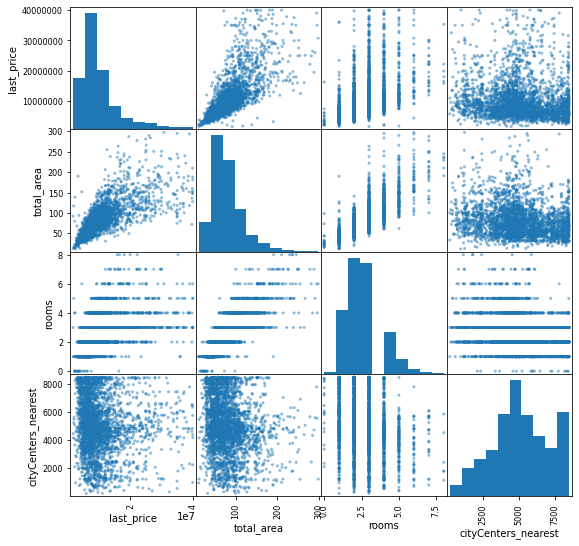

In [58]:
#построим матрицу диаграмм рассеивания для пар (last_price, total_area), (last_price, rooms), (last_price, cityCenters_nearest)
good_real_estate_matrix_spb_center = good_real_estate_spb_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(good_real_estate_matrix_spb_center, figsize=(9, 9))

Выводы подтвердились стоимость квартир в центре Санкт-Петербурга в большей степени зависит от общей площади, и незначительно от числа комнат.

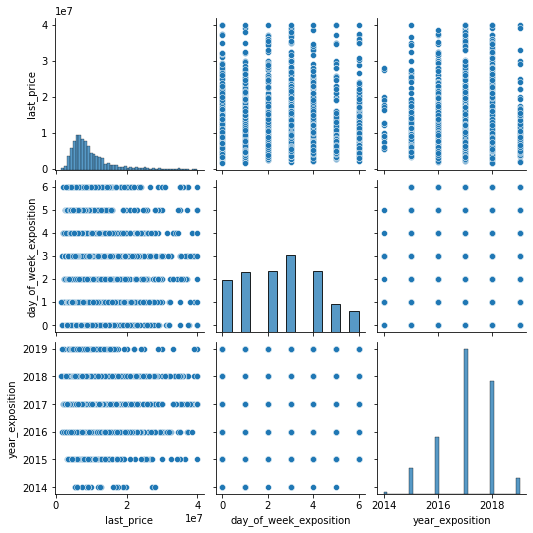

In [59]:
#построим диаграммы рассеивания для пар (last_price, day_of_week_exposition), (last_price, month_exposition), (last_price, year_exposition)
df_spb = good_real_estate_spb_center[['last_price','day_of_week_exposition', 'month_exposition', 'year_exposition']]
sns.pairplot(df_spb)

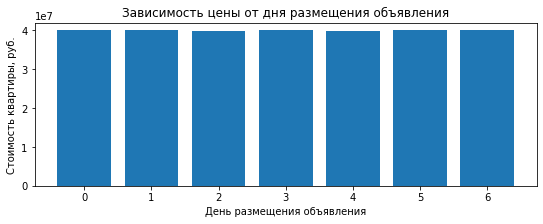

In [60]:
plt.figure(figsize=(9, 3))
plt.bar(df_spb['day_of_week_exposition'], df_spb['last_price'])

plt.title('Зависимость цены от дня размещения объявления')
plt.xlabel('День размещения объявления')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()


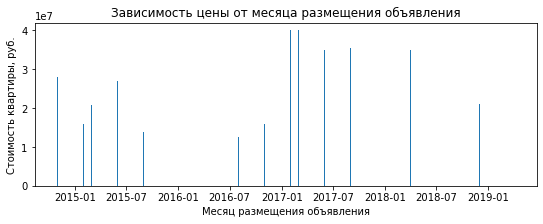

In [61]:
plt.figure(figsize=(9, 3))
plt.bar(df_spb['month_exposition'], df_spb['last_price'])

plt.title('Зависимость цены от месяца размещения объявления')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

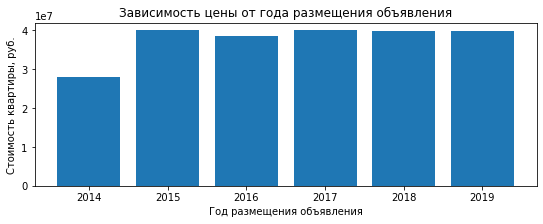

In [62]:
plt.figure(figsize=(9, 3))
plt.bar(df_spb['year_exposition'], df_spb['last_price'])

plt.title('Зависимость цены от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()


Рассчитаем долю и среднюю стоимость квартир в зависимости от этажа, на котором они расположены. 

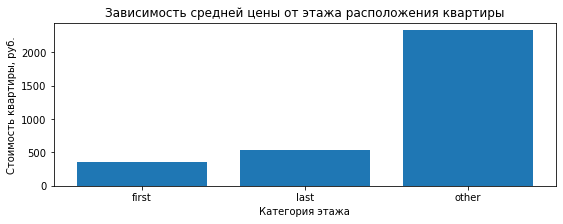

In [63]:
good_real_estate_spb_center_pivot = good_real_estate_spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='count').reset_index()
good_real_estate_spb_center_pivot['share_price'] = good_real_estate_spb_center.groupby('floor_type')['last_price'].mean()

plt.figure(figsize=(9, 3))
plt.bar(good_real_estate_spb_center_pivot['floor_type'], good_real_estate_spb_center_pivot['last_price'])

plt.title('Зависимость средней цены от этажа расположения квартиры')
plt.xlabel('Категория этажа')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()


Стоимость квартиры в центре Санкт-Петербурга зависит от этажа на котором она расположена. Квартиры расположенные на первом этаже имеют самую маленькую стоимость, а квартиры ни на первом ни на последнем этаже стоят дороже всего.

В целом зависимость цены квартиры в центре Санкт-Петербурга повторяет общую зависимость стоимости квартир в других населенных пунктах от параметров.

## Итоги исследования

Обзор данных выявил аномалии и пропуски в данных, поэтому данные потребовали предобработки.
При предобработке: столбцы `ceiling_height` и `floors_total`  очищены от аномальных значений.
Процент пропущенных значений в некоторых столбцах был значителен и требовал заполнения данными для проведения корректного исследования.
Названия населенных пунктов столбец `locality_name` приведен к однообразию, пропущенные значения заполнены исходя из данных о близости населенного пункта к центру. Названия населенных пунктов, которые восстановить не удалось заполнены 'unknown'.
Данные столбцов `floors_total`, `ceiling_height`, `airports_nearest`, `cityCenters_nearest` заполнены медианными значениями по группам населенных пунктов.
Данные в столбцах `is_apartment`, `balcony`, `days_exposition` заполнены наиболее подходящими значениями.
Количество пропущенных значений сократилось, однако они остались в столбцах: `living_area`, `kitchen_area`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.
Заменены типы данных в столбцах: `last_price`, `floors_total`, `balcony`, `days_exposition` на разумные целочисленные значения. 
Столбец `first_day_exposition` приведен к типу дата, для вычисления дня, месяца и года публикации объявления.
Дубликатов строк в данных не обнаружено.
Данные подготовлены для проведения дальнейшего исследования.

Рассчитали и добавили дополнительные столбцы: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры (варианты — первый, последний, другой); отношение жилой к общей площади, а также отношение площади кухни к общей.

С помощью диаграмм размаха для данных total_area, last_price, rooms, ceiling_height выяснили, что
больше всего квартир общей площадью от 40 до 70 квадратных метров и не превышает по стоимости 30 000 000. Квартиры площадью больше 300 метров встречаются очень редко. 
Основная часть квартир имеют максимум 3 комнаты и их стоимость находятся в пределах от 3 400 000 до 6 800 000. Квартир с числом комнат больше 9 вообще единицы. Высоту потолков более 4 метров имеют лишь отдельные квартиры. 
Обычно период продажи квартиры составляет от 22 до 199 , в среднем 74 дня. 
Случаются как очень быстрые, так и очень долгие продажи. Быстрой можно считать продажу, если она произошла за срок до 22 дней. Очень долгими можно назвать продажи дольше 470 дней.

Для расчета более точных показателей удалили редкие и выбивающиеся значения:
- за верхнюю границу дней продажи взяли значение 1000 дней;
- срок размещения объявления определили в период от 2 до 470 дней;
- площадь квартир ограничили значением в 300 метров;
-  число комнат ограничили 8;
- верхнюю границу высоты потолков установили на 4 метрах;
- стоимость ограничили 40 000 000.
После удаления строк с выбивающимися значениями из 23699 строк осталось 20035. 

Выбрали 10 населённых пунктов с наибольшим числом объявлений и рассчитали для каждого среднюю цену квадратного метра.
Самая высокая средняя цена квадратного метра в Санкт-Петербурге.
При помощи графиков зависимости общей стоимости и цены квадратного метра квартир, выяснили, что к центру Санкт-Петербурга относится зона радиусом 8 км, т.к. после этого расстояния наблюдается заметное снижение цены.

Рассчитали коэффициенты корреляции по столбцам `last_price`, `total_area`, `rooms`, `cityCenters_nearest`. Для всех квартир и для квартир, относящихся к центру Санкт-Петербурга. Также построили матрицы диаграмм рассеивания для указанных данных. Построили столбчатые диаграммы для столбцов `day_of_week_exposition`, `month_exposition`, `year_exposition`.
Из таблиц и графиков определили, что на стоимость квартир в общих данных и для квартир в центре Санкт-Петербурга сильнее всего оказывает влияние площадь квартиры, в незначительной степени число комнат, что обуславливается сильной зависимостью площади квартиры от числа комнат.
Связь удаленности от центра и стоимости квартиры обратная и выражена слабо в обоих случаях. Также выяснили, что стоимость квартир не связана с днем недели, месяцем и годом публикации объявления. 
Из графиков видно, что наибольшее число объявлений приходилось на 2017 и 2018 годы, также в выходные число объявлений меньше, чем в будние дни. Также количество объявлений в начале и в конце года больше, чем в остальное время. 

Стоимость квартиры зависит от этажа на котором она расположена, это характерно и для общих данных и для квартир в центре города. Стоимость квартир, расположенных на первых этажах ниже, чем расположенных на последнем или другом этаже. Самая высокая стоимость у квартир расположенных ни на первом, ни на последнем этаже. 

Наибольшее число объявлений о продаже квартир в центре Санкт-Петербурга приходится на 3-х комнатные квартиры площадью около 50 м.кв, стоимость которых не превышает 7.5 млн, расположенные в 5 км от центра, что соотносится с общими данными.

В целом зависимость цены квартиры от рассматриваемых параметров в центре Санкт-Петербурга повторяет общую зависимость стоимости квартир в других населенных пунктах.
